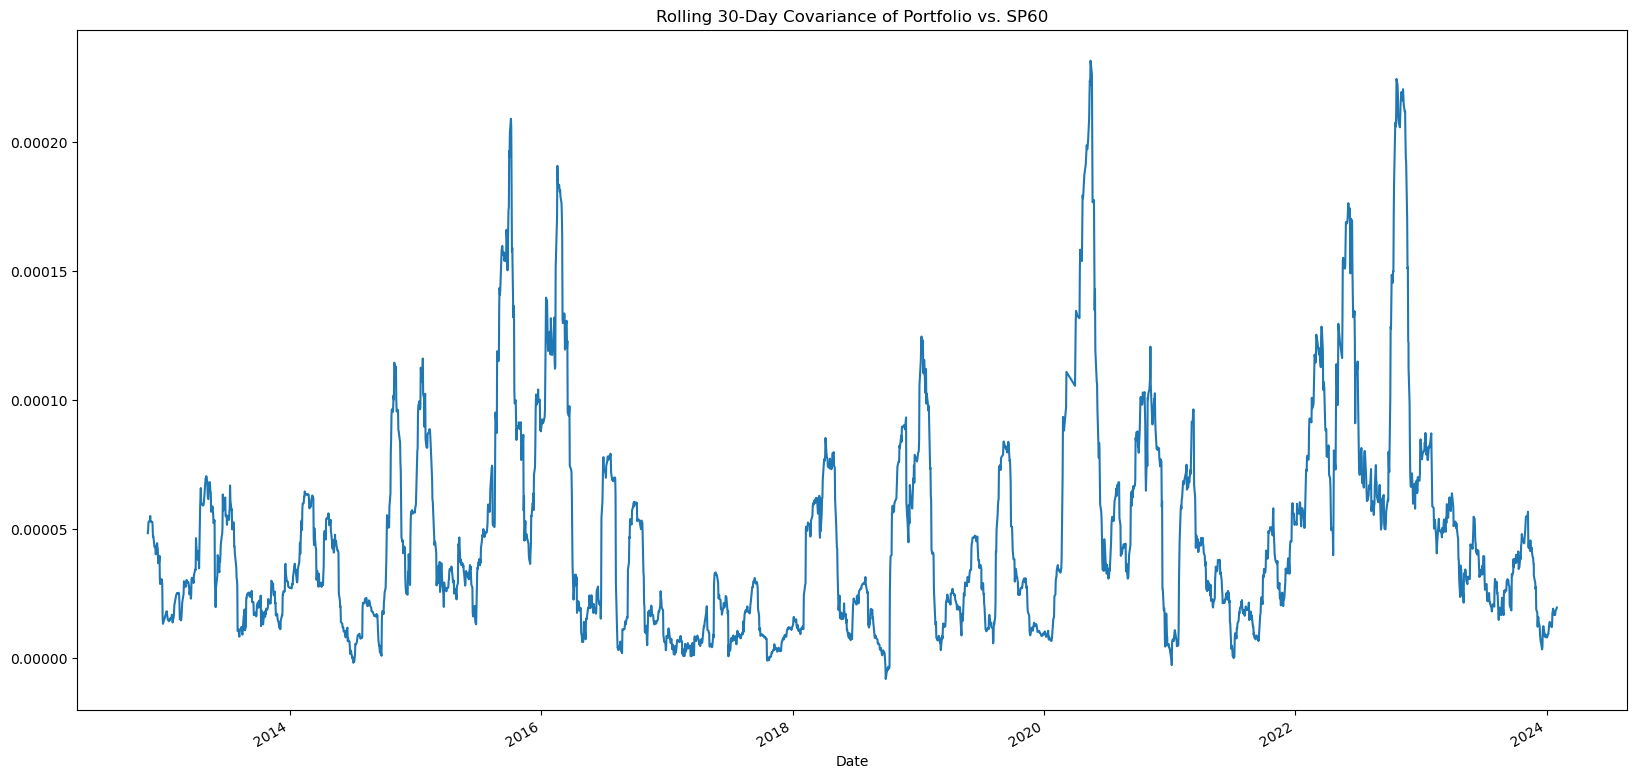

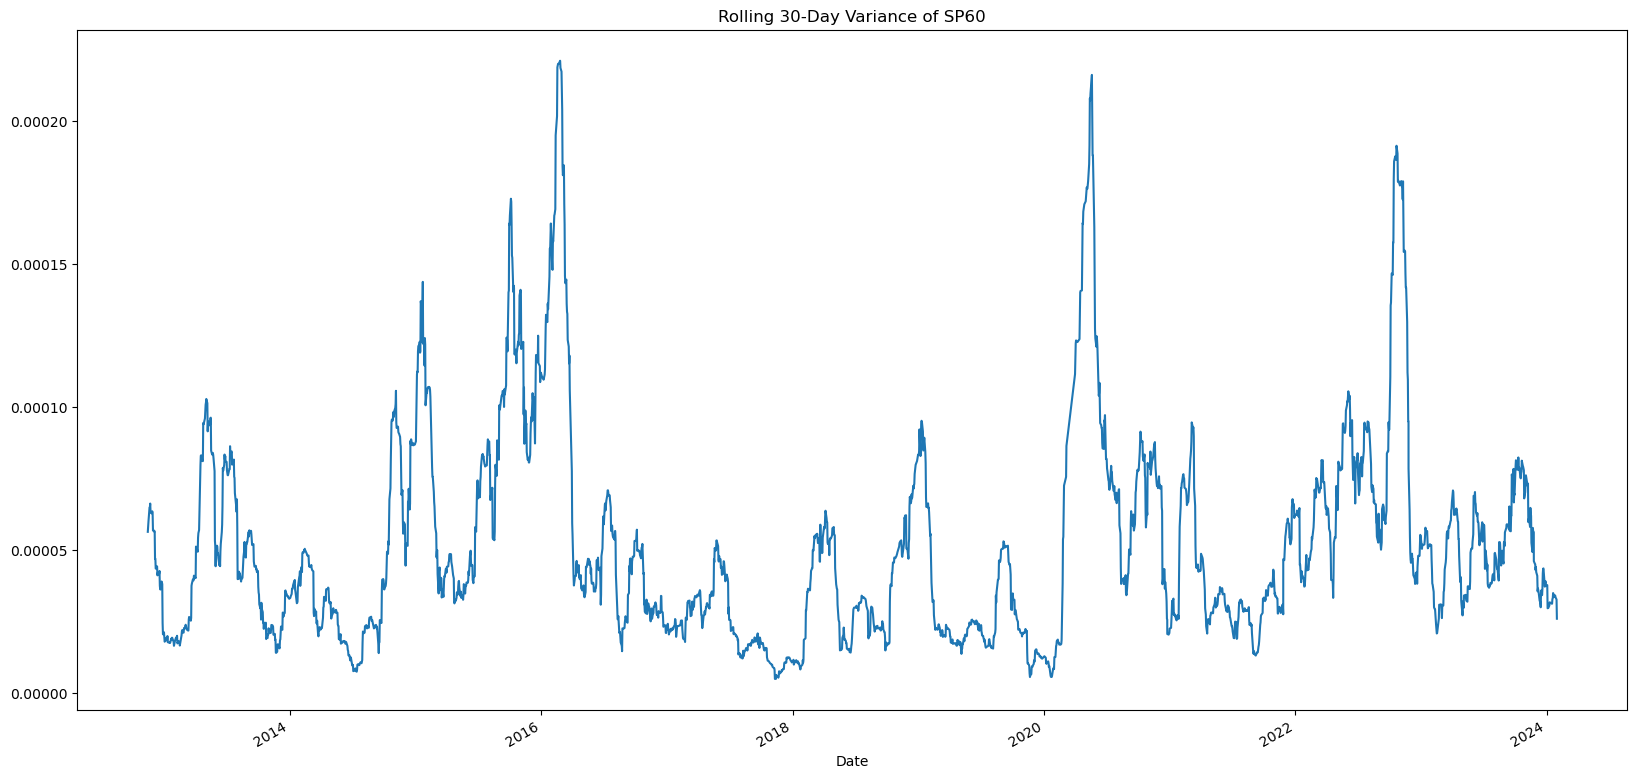

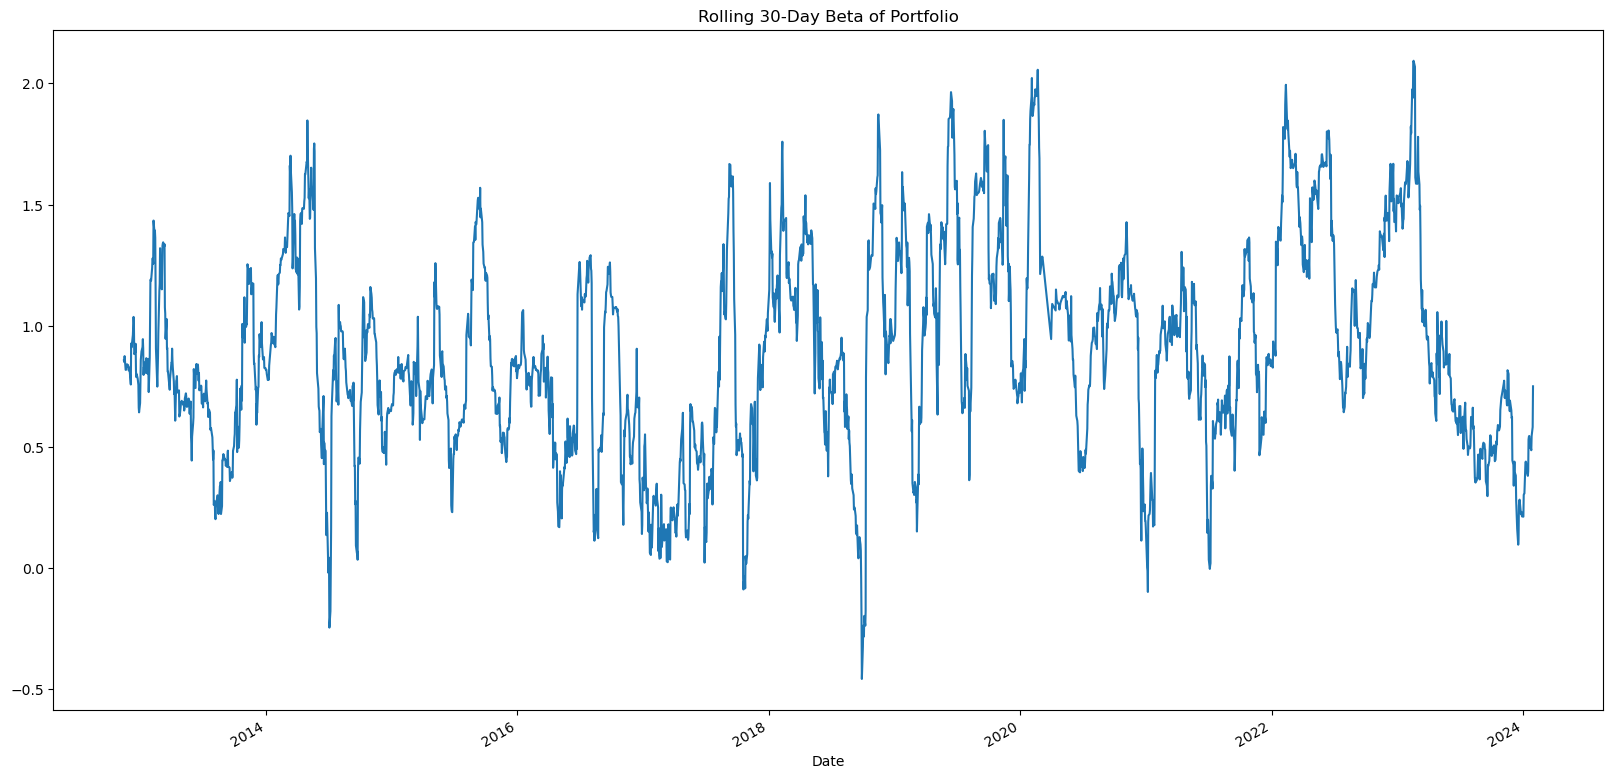

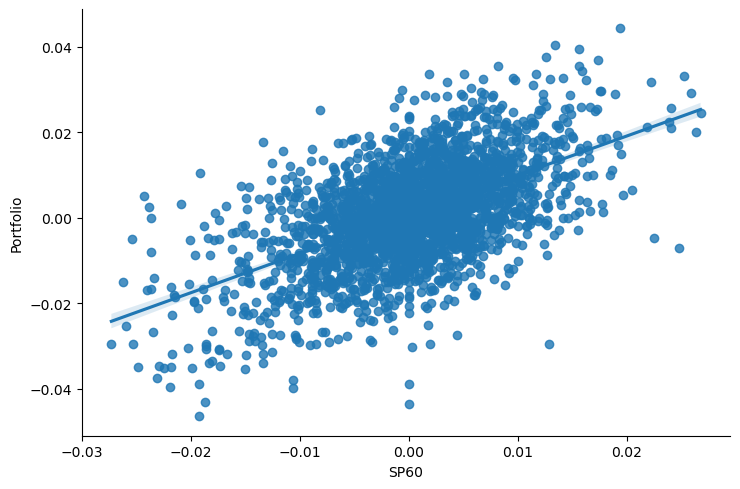

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read and prepare the data
ftnt = pd.read_csv('FTNT.csv', index_col='Date', parse_dates=['Date'])
vrtx = pd.read_csv('VRTX.csv', index_col='Date', parse_dates=['Date'])
nvda = pd.read_csv('NVDA.csv', index_col='Date', parse_dates=['Date'])
wm = pd.read_csv('WM.csv', index_col='Date', parse_dates=['Date'])
ecl = pd.read_csv('ECL.csv', index_col='Date', parse_dates=['Date'])
sp60 = pd.read_csv('SP60_TSE_XIU.csv', index_col='Date', parse_dates=['Date'])

# Combine and clean data
combined_df = pd.concat([ftnt['Close'], vrtx['Close'], nvda['Close'], wm['Close'], ecl['Close'], sp60['Close']], axis=1)
combined_df.columns = ['FTNT', 'VRTX', 'NVDA', 'WM', 'ECL', 'SP60']
combined_df.ffill(inplace=True)  # Forward fill to handle NaNs

# Calculate daily returns
daily_returns = combined_df.pct_change().dropna()

# Remove outliers in daily returns
z_scores = stats.zscore(daily_returns)
filtered_entries = (np.abs(z_scores) < 3).all(axis=1)
daily_returns = daily_returns[filtered_entries]

# Calculate equally weighted portfolio returns
weights = np.array([1/5, 1/5, 1/5, 1/5, 1/5])
portfolio_returns = daily_returns.iloc[:, :5].dot(weights)
daily_returns['Portfolio'] = portfolio_returns

# Calculate rolling statistics
rolling_covariance = daily_returns['Portfolio'].rolling(window=30).cov(daily_returns['SP60'])
rolling_variance = daily_returns['SP60'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance

# Plot rolling statistics
plt.figure(figsize=(20, 10))
rolling_covariance.plot(title='Rolling 30-Day Covariance of Portfolio vs. SP60')
plt.show()

plt.figure(figsize=(20, 10))
rolling_variance.plot(title='Rolling 30-Day Variance of SP60')
plt.show()

plt.figure(figsize=(20, 10))
rolling_beta.plot(title='Rolling 30-Day Beta of Portfolio')
plt.show()

sns.lmplot(x='SP60', y='Portfolio', data=daily_returns, aspect=1.5, fit_reg=True)
plt.show()
